# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [12]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [4]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

Distribución de los fraudes (%):
fraud
0.0    91.2597
1.0     8.7403
Name: proportion, dtype: float64


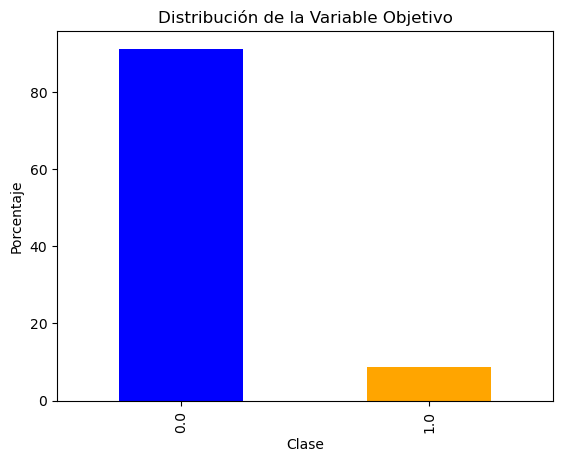

In [16]:
class_distribution = fraud['fraud'].value_counts(normalize=True) * 100
print("Distribución de los fraudes (%):")
print(class_distribution)

# Visualización opcional para entender mejor
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title("Distribución de la Variable Objetivo")
plt.xlabel("Clase")
plt.ylabel("Porcentaje")
plt.show()


In [26]:
y = fraud['fraud']
X = fraud.drop(columns=['fraud'])

def evaluate_model(y_test, y_pred, y_proba):
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred, y_proba)

Confusion Matrix:
 [[271936   1843]
 [ 10432  15789]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273779
         1.0       0.90      0.60      0.72     26221

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000

ROC-AUC Score: 0.9671825591607093


In [24]:
# Oversampling 
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
model.fit(X_resampled, y_resampled)

# Predicciones y evaluación tras Oversampling
y_pred_ros = model.predict(X_test)
y_proba_ros = model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_ros, y_proba_ros)

Confusion Matrix:
 [[255518  18261]
 [  1357  24864]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

ROC-AUC Score: 0.9795659368491149


In [22]:
# Undersampling 
rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)
model.fit(X_resampled_rus, y_resampled_rus)

# Predicciones y evaluación tras Undersampling
y_pred_rus = model.predict(X_test)
y_proba_rus = model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_rus, y_proba_rus)

Confusion Matrix:
 [[255526  18253]
 [  1327  24894]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

ROC-AUC Score: 0.9795872747289083


In [18]:
# SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)
model.fit(X_resampled_smote, y_resampled_smote)

# Predicciones y evaluación tras SMOTE
y_pred_smote = model.predict(X_test)
y_proba_smote = model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_smote, y_proba_smote)

Confusion Matrix:
 [[255666  18113]
 [  1401  24820]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

ROC-AUC Score: 0.9792851688284365
